In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

--2023-12-12 16:16:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.10, 108.157.172.173, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv’

walmart_data.csv    100%[===================>]  21.96M  72.5MB/s    in 0.3s    

2023-12-12 16:16:20 (72.5 MB/s) - ‘walmart_data.csv’ saved [23027994/23027994]



In [ ]:
data = pd.read_csv("walmart_data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.shape

(550068, 10)

In [ ]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Non-Graphical Analysis: Value counts and unique attributes ​**

In [ ]:
gender_counts = data['Gender'].value_counts()
gender_counts

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
unique_ages = data['Age'].unique()
unique_ages

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
city_counts = data['City_Category'].value_counts()
city_counts

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
unique_occupations = data['Occupation'].unique()
unique_occupations

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
marital_status_counts = data['Marital_Status'].value_counts()
marital_status_counts

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
unique_product_categories = data['Product_Category'].unique()
unique_product_categories

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

<ipython-input-63-feebfd41e676>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Purchase'], bins=30, kde=True, color='blue')


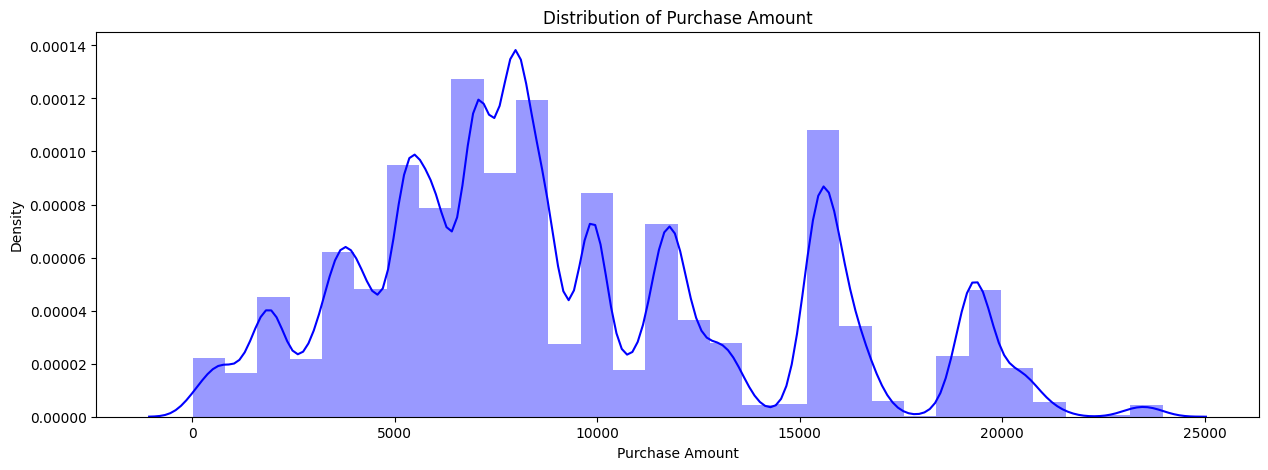

In [ ]:
plt.figure(figsize=(15, 5))

# Distplot (Kernel Density Estimate + Histogram)
sns.distplot(data['Purchase'], bins=30, kde=True, color='blue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()

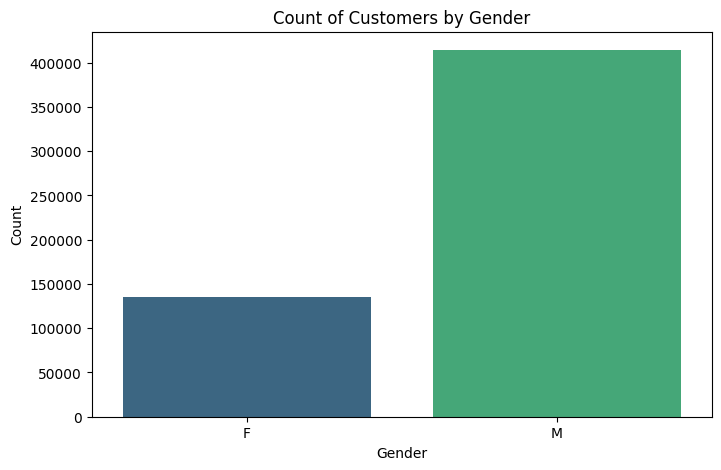

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

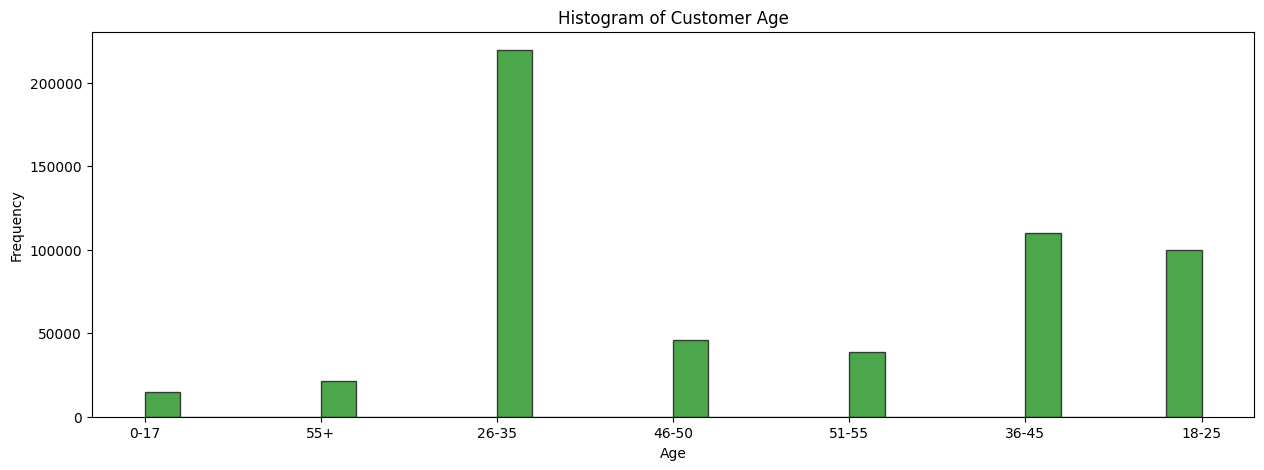

In [ ]:
plt.figure(figsize=(15, 5))
plt.hist(data['Age'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

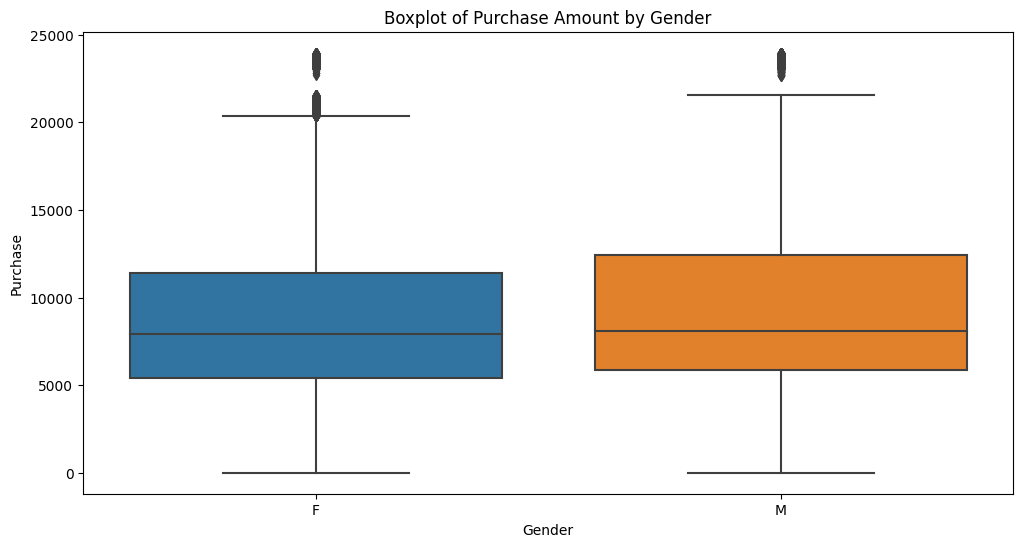

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Gender", y="Purchase", data=data)
plt.title("Boxplot of Purchase Amount by Gender")
plt.show()

<ipython-input-80-49c175f7b43a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_data = data.corr()


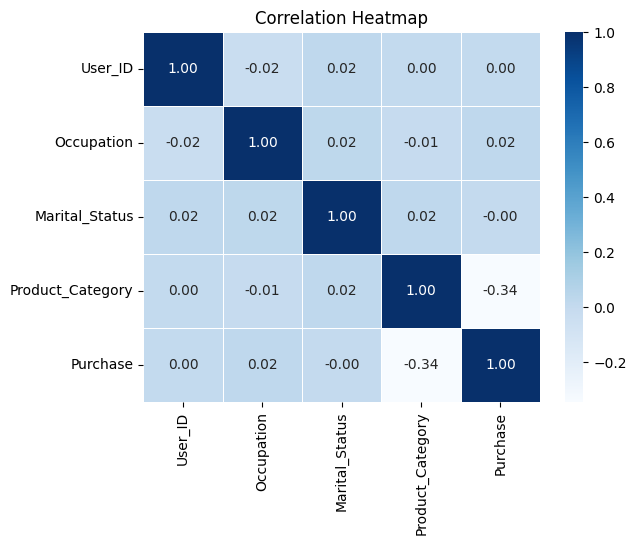

In [ ]:
correlation_data = data.corr()
# plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Missing Values**

In [ ]:
missing_values = data.isnull().sum()
missing_values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Outlier detection using boxplot**

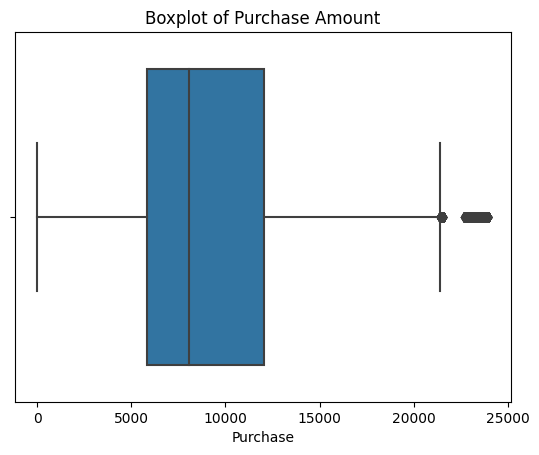

In [ ]:
sns.boxplot(x="Purchase", data=data)
plt.title("Boxplot of Purchase Amount")
plt.show()

**Descriptive statistics for 'Purchase' to identify outlier**

In [ ]:
purchase_stats = data['Purchase'].describe()

# Identifying outliers using IQR (Interquartile Range)
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Purchase'] < lower_bound) | (data['Purchase'] > upper_bound)]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


# Business Insights based on Non-Graphical and Visual Analysis:


1. Gender: There are two gender categories - Male and Female.

2. Age: Age is categorized into bins, providing a range for different life stages.
3. Occupation: Occupation is masked, and the range of values might represent different job categories.
4. City_Category: City categories are represented as A, B, and C.
5. StayInCurrentCityYears: Indicates the number of years a customer has stayed in the current city.
6. Marital_Status: Represents whether a customer is married (1) or unmarried (0).
7. ProductCategory: Product categories are masked and represent different types of products.
8. Purchase: Represents the purchase amount, and its range provides insights into customer spending behavior.


## Comments on the distribution of the variables and relationship between **them**



1.   Gender vs. Purchase: The distribution of purchase amounts for both genders can be observed. Visual analysis can reveal whether there are significant differences in spending patterns between male and female customers.

2. Age vs. Purchase:
The distribution of purchase amounts across different age groups provides insights into the buying behavior of customers at various life stages.

3. Occupation vs. Purchase:
Understanding the distribution of purchase amounts across different occupations can help identify potential customer segments with varying spending capacities.

4. Marital_Status vs. Purchase:
Analyzing the impact of marital status on purchase amounts can help tailor marketing strategies for married and unmarried customers.



# Comments on Univariate and Bivariate Plots:



1.  Distplot for Purchase:
 The distribution of purchase amounts is right-skewed, indicating a concentration of lower-value transactions with a few higher-value transactions. This is common in retail datasets.

2. Countplot for Gender:
The countplot shows the distribution of customers by gender. It provides a clear picture of the gender distribution within the dataset.

3. Boxplot for Gender vs. Purchase:
The boxplot helps identify the central tendency and spread of purchase amounts for different genders. It can reveal potential differences in spending patterns.

4. Histogram for Age:
The histogram provides an overview of the age distribution, highlighting the prevalence of certain age groups.

5. Outlier Detection using Boxplot:
The boxplot for 'Purchase' assists in identifying potential outliers. Understanding these outliers is crucial for decision-making, as they might represent significant transactions or anomalies.

In [ ]:
data.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
female_expenses = data[data['Gender'] == 'F']['Purchase']
male_expenses = data[data['Gender'] == 'M']['Purchase']

In [ ]:
avg_female_expense = female_expenses.mean()
avg_male_expense = male_expenses.mean()


In [ ]:
#Female Expense
avg_female_expense

8734.565765155476

In [ ]:
#Male Expense
avg_male_expense

9437.526040472265

As we see from above values, average expense of male is more the female

1. Why or Why Not:
  1.
Possible Factors:
Differences in product preferences between genders.
  2. Variation in purchasing power or income levels.


In [ ]:
# Inference after computing the average female and male expenses.

In [ ]:
confidence_level = 0.95
female_interval = stats.norm.interval(confidence_level, loc=avg_female_expense, scale=female_expenses.std())
male_interval = stats.norm.interval(confidence_level, loc=avg_male_expense, scale=male_expenses.std())


In [ ]:
female_interval

(-609.0397877561991, 18078.17131806715)

In [ ]:
male_interval

(-542.9755332640816, 19418.02761420861)

In [ ]:
if female_interval[1] < male_interval[0] or male_interval[1] < female_interval[0]:
    print("Confidence intervals do not overlap.")
    print("Walmart can leverage this conclusion to make targeted marketing or promotions.")
else:
    print("Confidence intervals  overlap.")

Confidence intervals  overlap.


In [ ]:
confidence_level = 0.9
female_interval = stats.norm.interval(confidence_level, loc=avg_female_expense, scale=female_expenses.std())
male_interval = stats.norm.interval(confidence_level, loc=avg_male_expense, scale=male_expenses.std())


In [ ]:
female_interval

(893.1647987406204, 16575.966731570326)

In [ ]:
male_interval

(1061.6250842066966, 17813.426996737828)

In [ ]:
if female_interval[1] < male_interval[0] or male_interval[1] < female_interval[0]:
    print("Confidence intervals do not overlap.")
    print("Walmart can leverage this conclusion to make targeted marketing or promotions.")
else:
    print("Confidence intervals overlap.")

Confidence intervals overlap.


In [ ]:
confidence_level = 0.99
female_interval = stats.norm.interval(confidence_level, loc=avg_female_expense, scale=female_expenses.std())
male_interval = stats.norm.interval(confidence_level, loc=avg_male_expense, scale=male_expenses.std())


In [ ]:
female_interval

(-3545.013438255275, 21014.144968566226)

In [ ]:
male_interval

(-3679.0764178014397, 22554.12849874597)

In [ ]:
if female_interval[1] < male_interval[0] or male_interval[1] < female_interval[0]:
    print("Confidence intervals do not overlap.")
    print("Walmart can leverage this conclusion to make targeted marketing or promotions.")
else:
    print("Confidence intervals overlap.")

Confidence intervals overlap.


## Conclusion
If the confidence intervals of average spending for male and female customers overlap, it suggests that there may not be a statistically significant difference in their spending patterns. Walmart can leverage this conclusion to focus on universal marketing strategies, streamline inventory management for gender-neutral products, and enhance overall customer experience without gender-specific customization.

# Married vs Unmarried

In [ ]:
# Amount spent per transaction for married and unmarried customers
married_expenses = data[data['Marital_Status'] == 1]['Purchase']
unmarried_expenses = data[data['Marital_Status'] == 0]['Purchase']

avg_married_expense = married_expenses.mean()
avg_unmarried_expense = unmarried_expenses.mean()


married_interval = stats.norm.interval(confidence_level, loc=avg_married_expense, scale=married_expenses.std())
unmarried_interval = stats.norm.interval(confidence_level, loc=avg_unmarried_expense, scale=unmarried_expenses.std())

if married_interval[1] < unmarried_interval[0] or unmarried_interval[1] < married_interval[0]:
    print("Confidence intervals do not overlap for Married and Unmarried customers.")
else:
    print("Confidence intervals overlap for Married and Unmarried customers.")


Confidence intervals overlap for Married and Unmarried customers.


# Results when the same activity is performed for Age

In [ ]:
age_groups = data.groupby('Age')['Purchase']
avg_expenses_by_age = age_groups.mean()
avg_expenses_by_age

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64